# EDA 


## 확인할 사항
- 과목별 리뷰 
- 학기별 리뷰 
- 년도별 리뷰  / 수업 형태(대면/비대면)에 따른 변동
- 평점은 교수와 과목 중 어느 것에 영향을 받는지
- 워드 클라우드

    - 평점 5점 리뷰
    - 평점 4점 이하 리뷰
    - 공감수 분포 확인 후 공감수 평균 이상인 리뷰

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

# 한글 폰트 설정
import matplotlib
# 변경하고 싶은 폰트를 '=' 우측에 넣어주기(아래에서 폰트 리스트 확인)
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기 설정
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

In [ ]:
url_1 = 'C:\\JupyterNotebook\\COIN\\에브리타임 강의 평가\\1. 크롤링\인문캠 에타 리뷰.csv'
url_2 = 'C:\\JupyterNotebook\\COIN\\에브리타임 강의 평가\\1. 크롤링\자연캠 에타 리뷰.csv'

df_1 = pd.read_csv(url_1)
df_2 = pd.read_csv(url_2)

# 자연캠 인문캠 합치기
df = pd.concat([df_1, df_2])

print(df_1.shape)
print(df_2.shape)
print(df.shape)

(19358, 7)
(12813, 7)
(32171, 7)


In [ ]:
df

,캠퍼스,교수명,강의목록,리뷰,작성시점,평가별점수,공감수
0,인문,강명훈,비교정치론,정치학도로써 새롭게 더 배우고 싶다면 추천할게요!\n수업 방식도 깔끔하고 좋습니다!...,22년 2학기 수강자,5,0
1,인문,강명훈,비교정치론,과제 없어서 일단 꿀이고 시험도 오픈북이라 매우 편함. 시험은 수업시간에 배운 내용...,22년 2학기 수강자,5,0
2,인문,강명훈,비교정치론,신율 교수님과 정성철 교수님 반반 섞으신 느낌이다.썰들을 쭉 푸시는데 맥락이 없지 ...,22년 2학기 수강자,4,0
3,인문,강명훈,비교정치론,갓 명 훈 ~\n되게 깔끔하게 강의하시는 편이에요\n성격도 깔끔하심\n생각할 거리를...,22년 2학기 수강자,5,0
4,인문,강명훈,비교정치론,"수업이나 과제가 어려워요, 교수님 정말 똑똑하신거 같음 당연한 이야기지만.. 배우는...",22년 1학기 수강자,4,0
...,...,...,...,...,...,...,...
12808,자연,교목실,채플,과제와 연강에 지친당신 1시간만 자고 가도록 하게나,18년 1학기 수강자,5,0
12809,자연,교목실,채플,채플은 채플이다.\n얼마나 더 성의있게 적어야되냐\n기승전 킹-수,18년 1학기 수강자,3,0
12810,자연,교목실,채플,믿고 거르는 채플.. 띵지인이라면 4학기 들어야함.. 항상 끝은 하나님임 ㅋㅋㅋ,18년 1학기 수강자,1,0
12811,자연,교목실,채플,영어채플 앙개꿀띠 그냥 채플보다 훨씬 덜 졸림\n영어채플이라고 그렇게 영어로만 꽉꽉...,18년 1학기 수강자,5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32171 entries, 0 to 12812
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   캠퍼스     32171 non-null  object
 1   교수명     32171 non-null  object
 2   강의목록    32171 non-null  object
 3   리뷰      32171 non-null  object
 4   작성시점    32171 non-null  object
 5   평가별점수   32171 non-null  int64 
 6   공감수     32171 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.0+ MB


###  과목별 리뷰

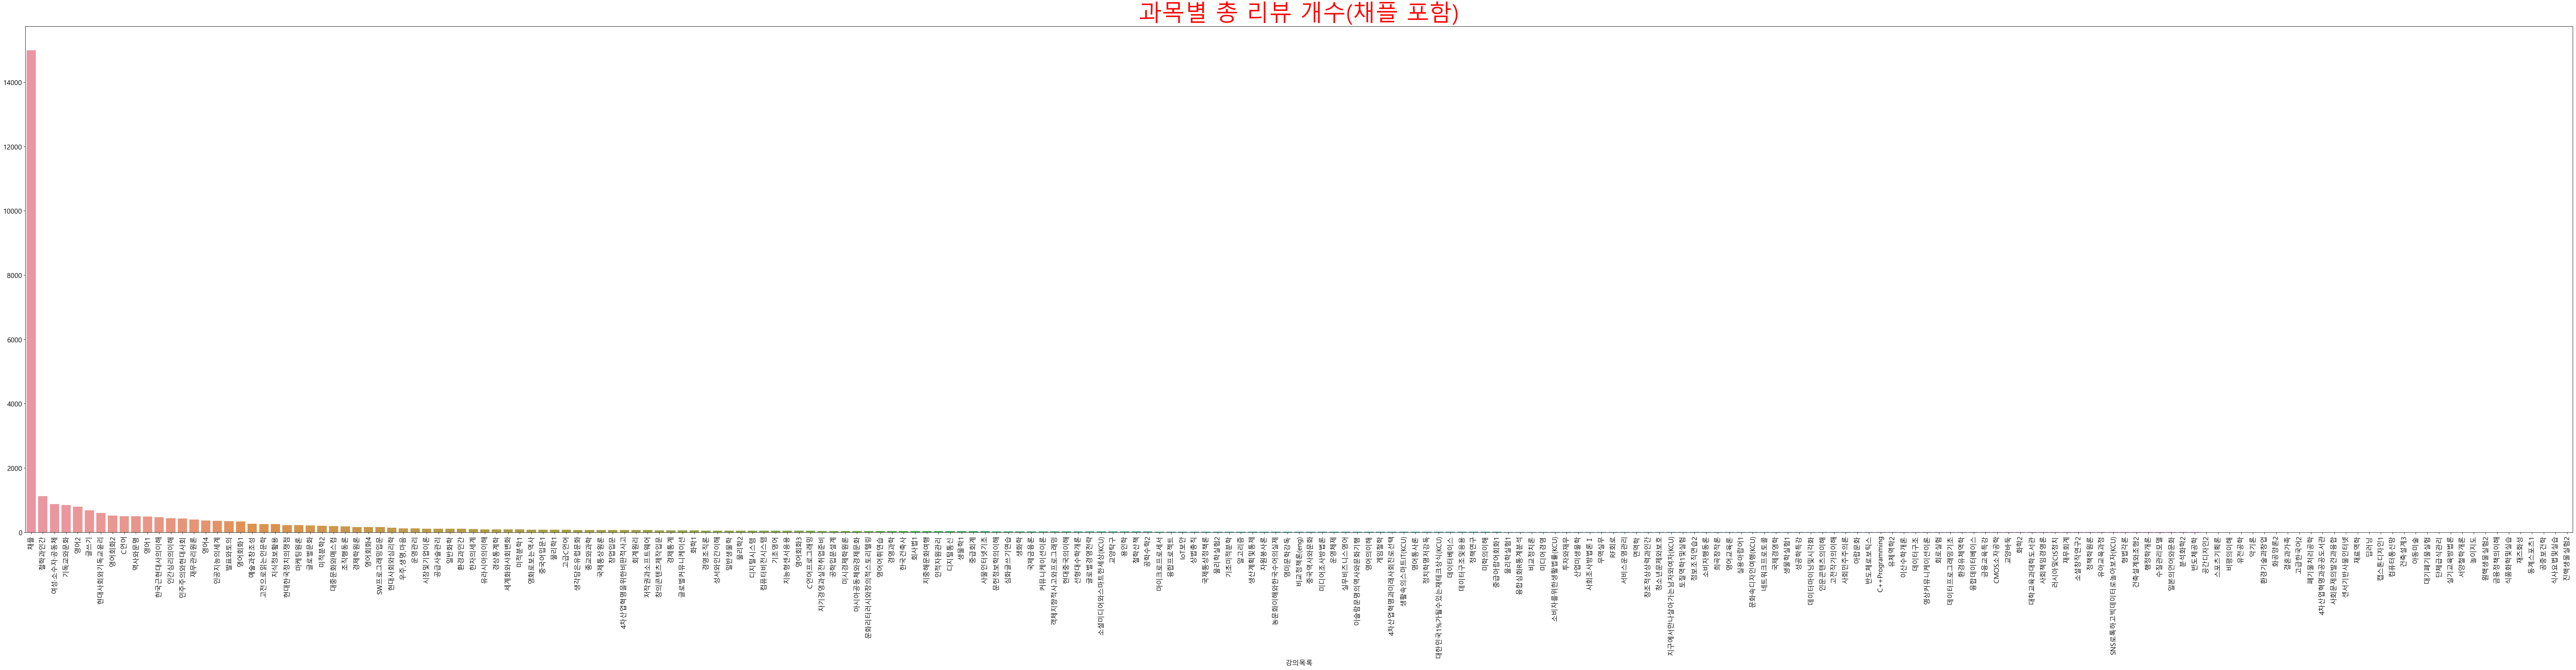

강의목록
채플            14993
철학과인간          1125
여성·소수자·공동체      877
기독교와문화          844
영어2             796
글쓰기             678
현대사회와기독교윤리      601
영어회화2           518
C언어             499
역사와문명           498
영어1             491
한국근현대사의이해       465
인간심리의이해         432
민주주의와현대사회       424
재무관리원론          393
영어4             369
인공지능의세계         357
발표와토의           340
영어회화1           338
예술과창조성          258
dtype: int64


In [ ]:
# 강의목록을 기준으로 그룹화 및 내림차순 정렬
sorted_lectures = df.groupby(['강의목록']).size().sort_values(ascending=False)


plt.figure(figsize=(100,20))
sns.barplot(x=sorted_lectures.index, y=sorted_lectures)
plt.title('과목별 총 리뷰 개수(채플 포함)', color='red', size=50)
plt.xticks(rotation=90)
plt.show()

print(sorted_lectures[:20])

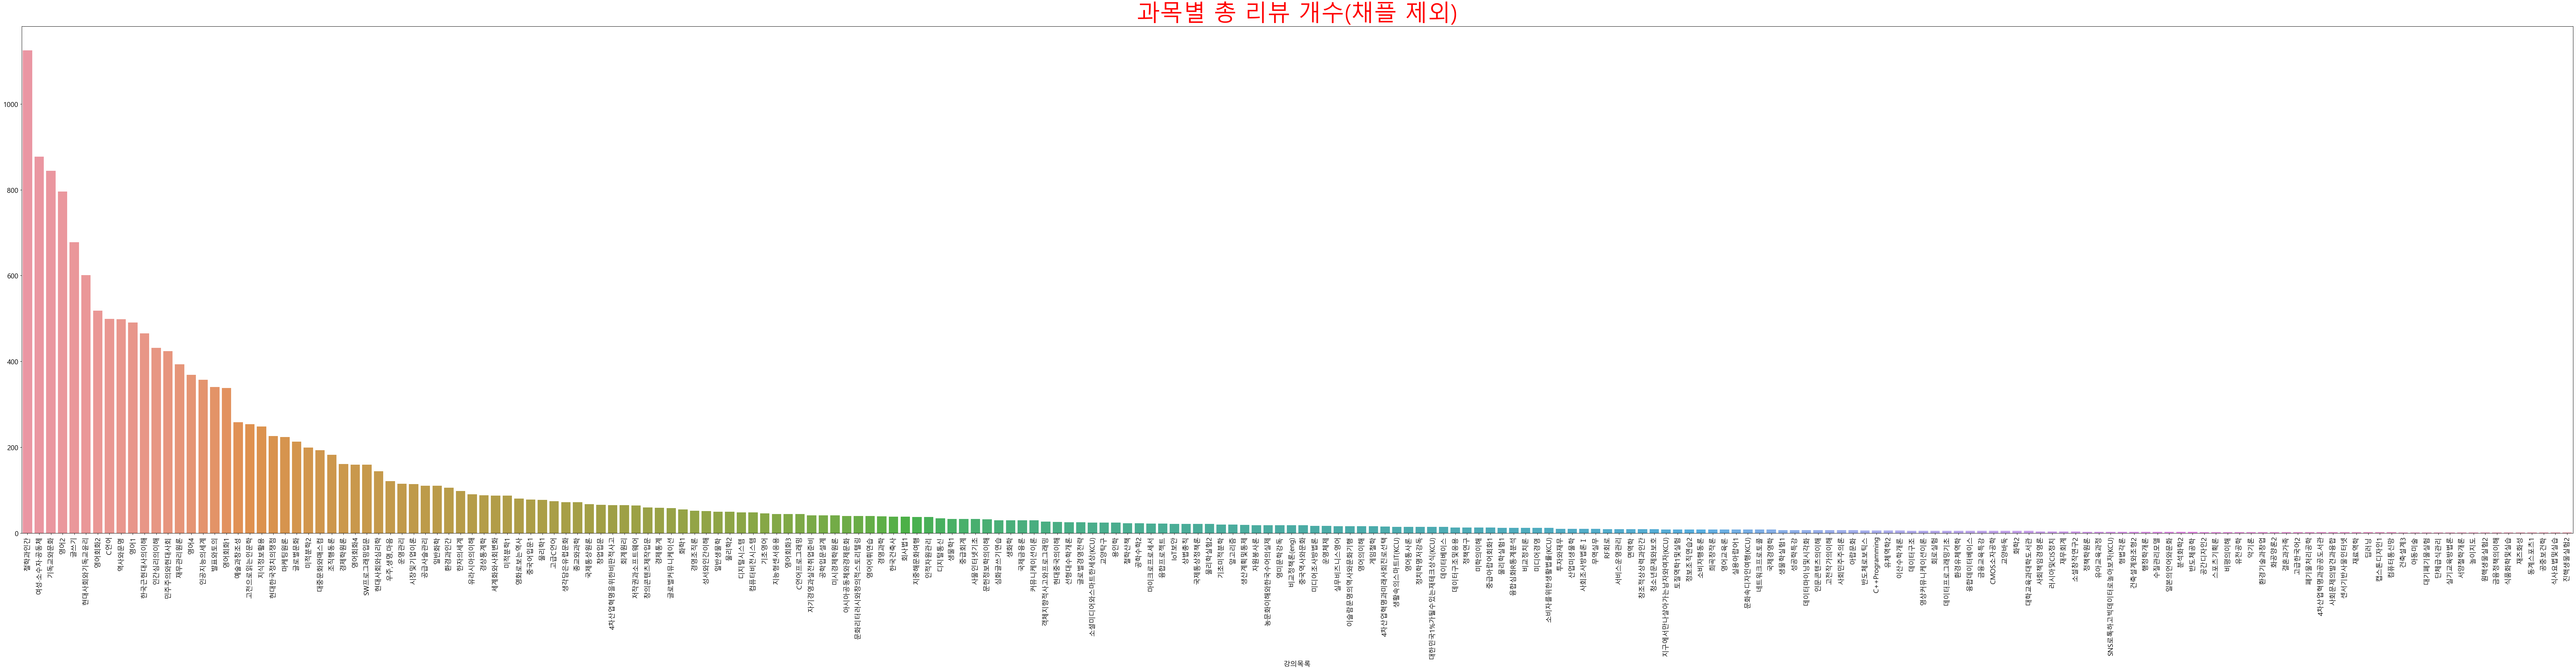

강의목록
철학과인간         1125
여성·소수자·공동체     877
기독교와문화         844
영어2            796
글쓰기            678
현대사회와기독교윤리     601
영어회화2          518
C언어            499
역사와문명          498
영어1            491
한국근현대사의이해      465
인간심리의이해        432
민주주의와현대사회      424
재무관리원론         393
영어4            369
인공지능의세계        357
발표와토의          340
영어회화1          338
예술과창조성         258
고전으로읽는인문학      254
dtype: int64


In [ ]:
# 채플을 빼고 확인하기
sorted_lectures_2 = sorted_lectures.drop(labels='채플')

plt.figure(figsize=(100,20))
sns.barplot(x=sorted_lectures_2.index, y=sorted_lectures_2)
plt.title('과목별 총 리뷰 개수(채플 제외)', color='red', size=50)
plt.xticks(rotation=90)
plt.show()

print(sorted_lectures_2[:20])

### 학기별/년도별 리뷰

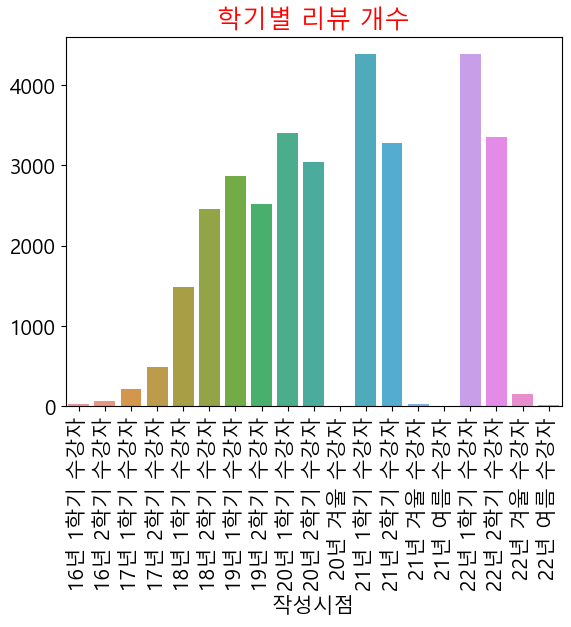

In [ ]:
# 강의목록을 기준으로 그룹화 및 내림차순 정렬
quarters_review = df.groupby(['작성시점']).size()

sns.barplot(x=quarters_review.index, y=quarters_review)
plt.xticks(rotation=90)
plt.title('학기별 리뷰 개수', color='red')
plt.show()


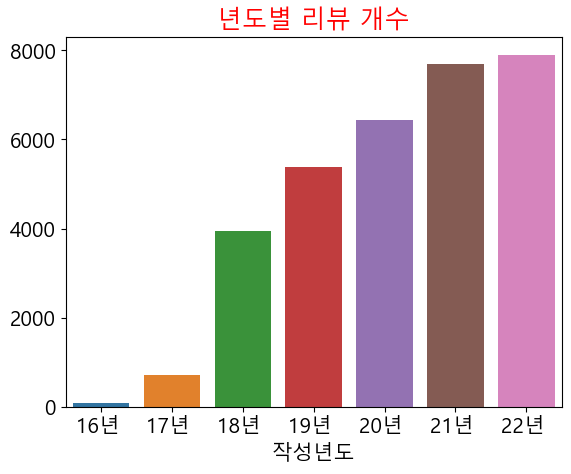

In [ ]:
# 년도별 확인
df['작성년도'] = df['작성시점'].str[:4]

year_review = df.groupby('작성년도').size()

sns.barplot(x=year_review.index, y=year_review)
plt.title('년도별 리뷰 개수', color='red')
plt.show()

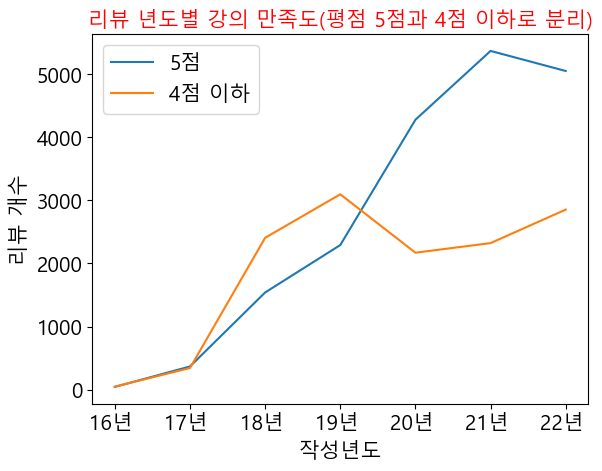

In [ ]:
# 평점 5점과 4점 이하 리뷰 나누기
df.loc[df['평가별점수'] == 5, '평점'] = 'good'
df.loc[df['평가별점수'] <= 4, '평점'] = 'bad'

# 두 컬럼을 기준으로 그룹화하면 MultiIndex가 되는데, .unstack() 메소드를 사용하여 인덱스가 하나가 되도록 변경
year_star = df.groupby(['작성년도', '평점']).size()
year_star = year_star.unstack()

plt.plot(year_star.index, year_star['good'], label='5점')
plt.plot(year_star.index, year_star['bad'], label='4점 이하')
plt.xlabel('작성년도')
plt.ylabel('리뷰 개수')
plt.title('리뷰 년도별 강의 만족도(평점 5점과 4점 이하로 분리)', color='red', size=15)
plt.legend()
plt.show()

### 평점이 달라지는 원인 : 교수 vs 과목
- 수업을 진행한 교수이 한 분인 경우에는 제외(평점이 교수에 따라 달라지는지, 과목에 따라 달라지는지 확인 불가하므로)
- 과목별로 평점이 최고인 교수, 최하인 교수를 확인한 후, subplot으로 한 줄에 볼 수 있게 그래프 그리기
- 그래프 해석 
    - 만약 한 점에만 평균 평점이 높거나 낮으면, 강의 평점은 과목에 영향을 받는다고 할 수 있음
    - 만약 튀는 점 없이 평탄하다면, 강의 평점은 교수에 영향을 받는다고 할 수 있음

In [ ]:
# 강의를 한 교수님이 두 분 이상인 강의만 남기기
lectures = df['강의목록'].unique()
lecture_list = []

for lec in lectures:
    temp_df = df[df['강의목록'] == lec].groupby('교수명').size()
    # 담당 교수가 2이상인 경우에만 lecture_list에 강의이름 append
    if len(temp_df) >= 2:
        lecture_list.append(lec)

# 따로 빼 놓은 강의목록만 DaraFrame으로 변경
lecture_df = df[df['강의목록'].isin(lecture_list)]

# 강의목록, 교수명으로 그룹화
mean_df = lecture_df.groupby(['강의목록', '교수명']).mean()

In [ ]:
def max_min_prof(grouped_df, lecture_name):
    # 과목별 평점이 최대인 교수만 추출
    max_index = np.argmax(grouped_df.xs(lecture_name, level='강의목록')['평가별점수']) # 해당 과목에서 평점이 최대인 교수의 인덱스
    max_prof = mean_df.xs(lecture_name, level='강의목록').index[max_index] # 위에서 구한 인덱스에 해당하는 교수 이름 반환
    max_df = mean_df.xs(max_prof, level='교수명') # 데이터프레임으로 추출


    # 과목별 평점이 최하인 교수
    min_index = np.argmin(grouped_df.xs(lecture_name, level='강의목록')['평가별점수'])
    min_prof = mean_df.xs(lecture_name, level='강의목록').index[min_index]
    min_df = mean_df.xs(min_prof, level='교수명')


    # 시각화(꺽은선 그래프가 왜 안되는지 모르겠음)
    fig, axs = plt.subplots(1, 2, figsize=(5,2))

    axs[0].bar(max_df.index, max_df['평가별점수'])
    axs[0].set_title(max_prof)
    axs[0].set_ylim([0, 6])
    axs[0].tick_params(rotation=45)

    axs[1].bar(min_df.index, min_df['평가별점수'])
    axs[1].set_title(min_prof)
    axs[1].set_ylim([0, 6])
    axs[1].tick_params(rotation=45)

    plt.show()

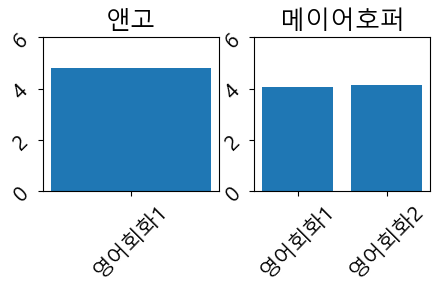

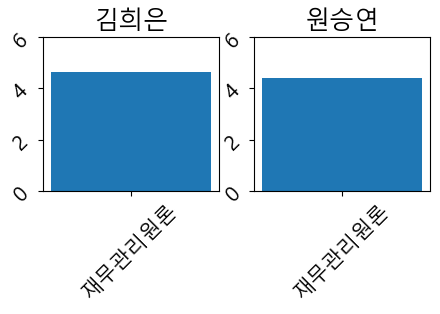

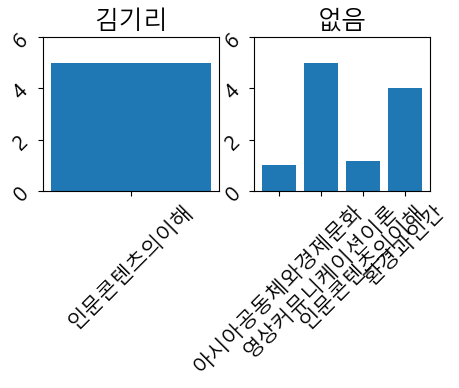

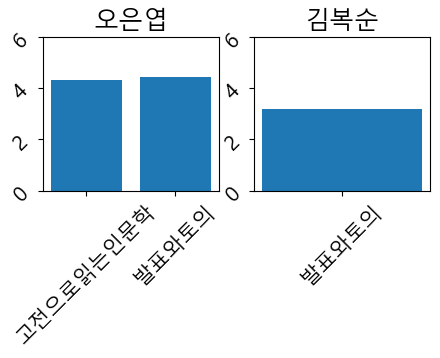

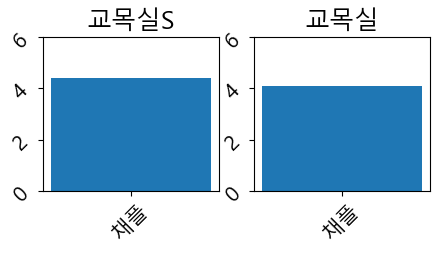

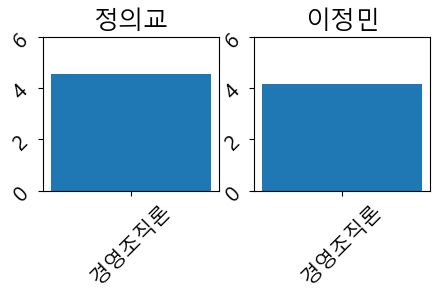

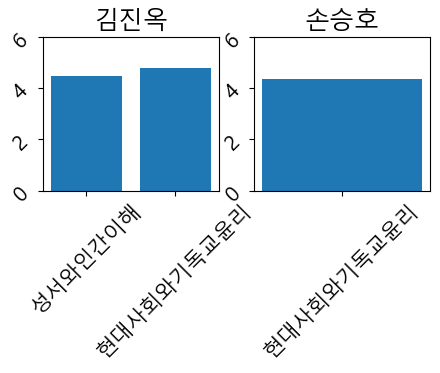

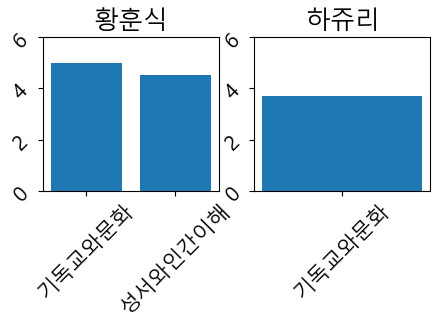

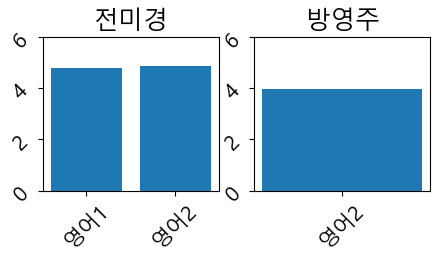

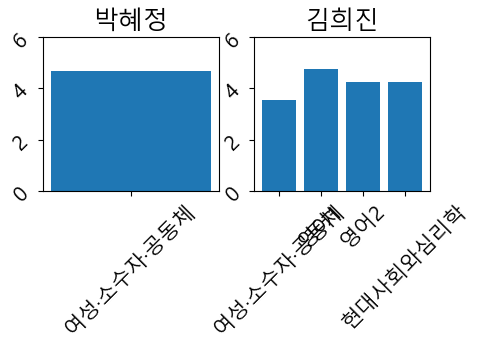

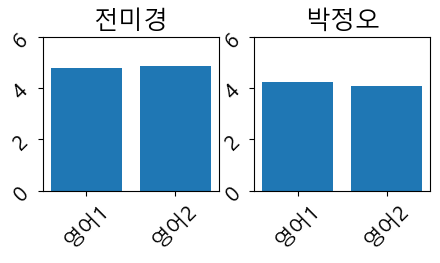

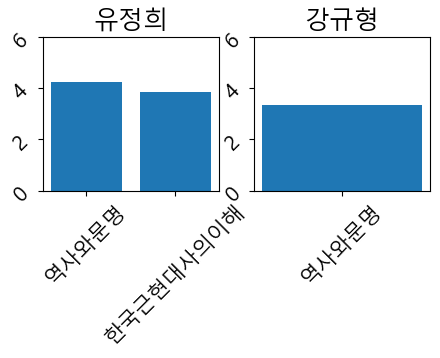

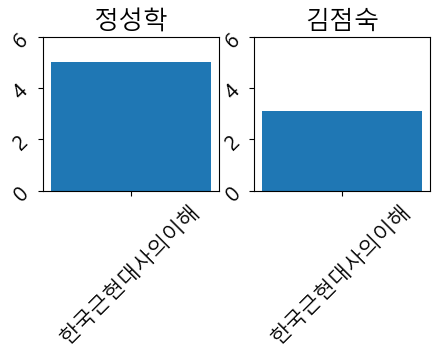

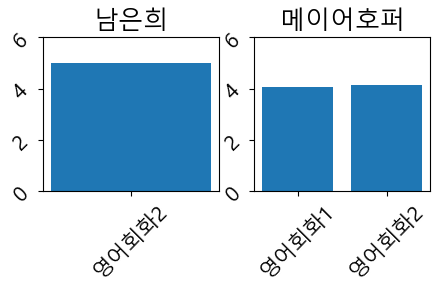

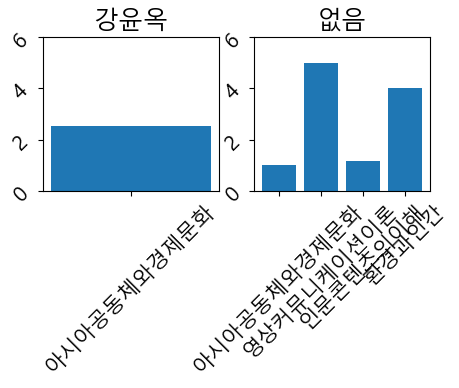

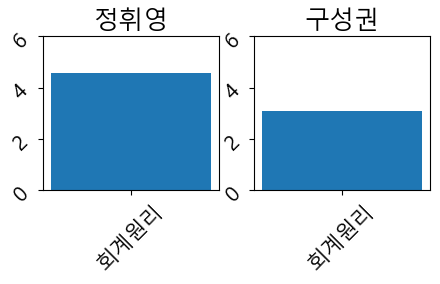

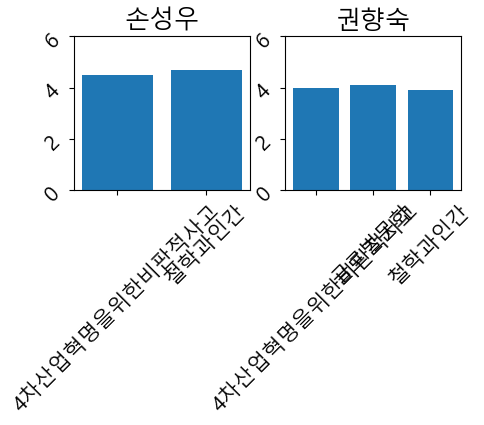

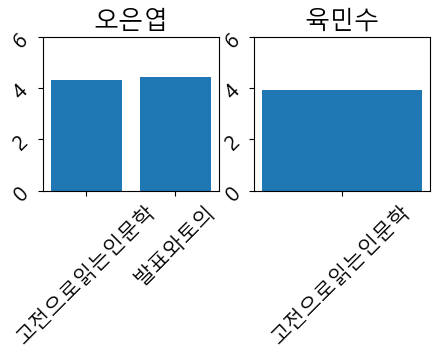

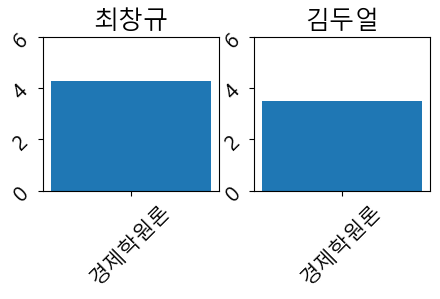

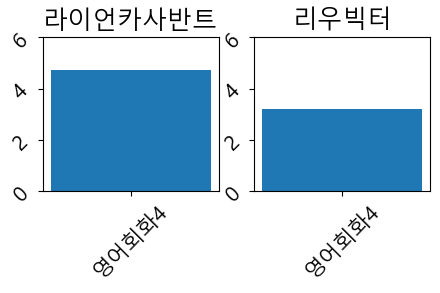

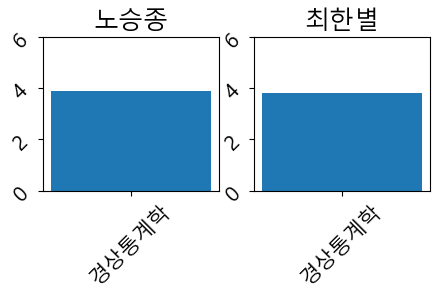

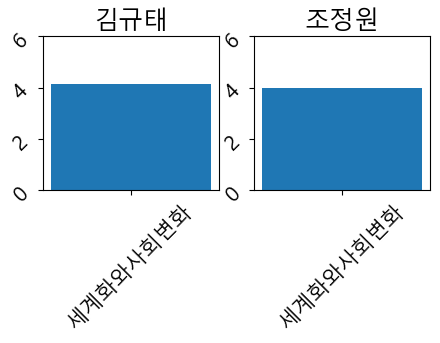

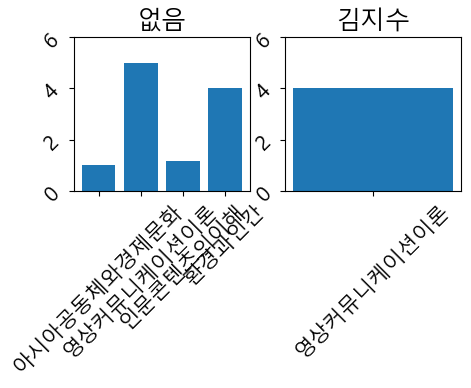

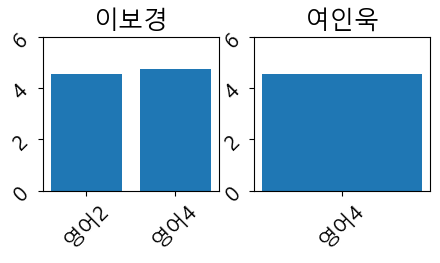

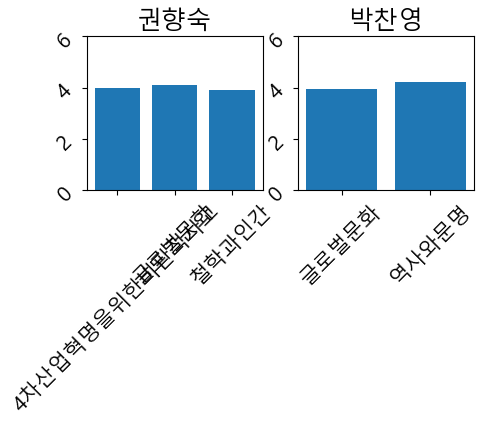

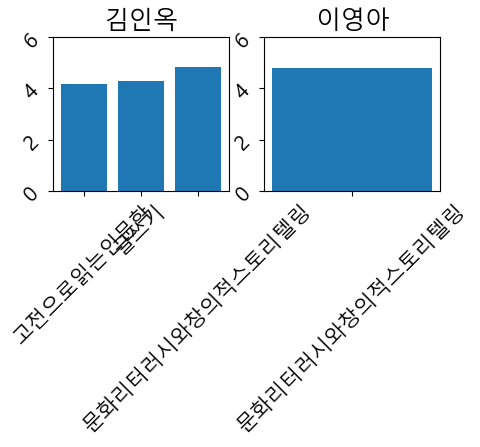

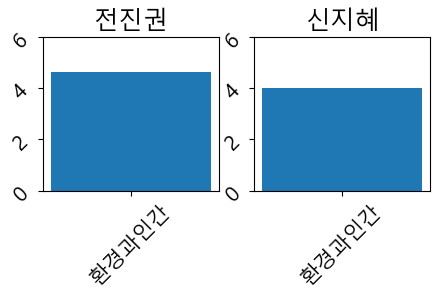

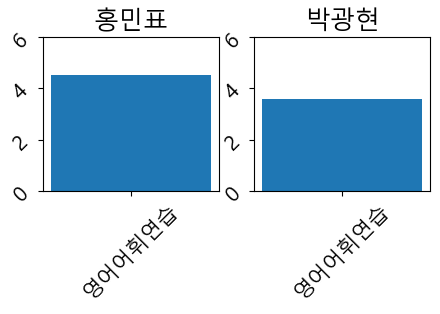

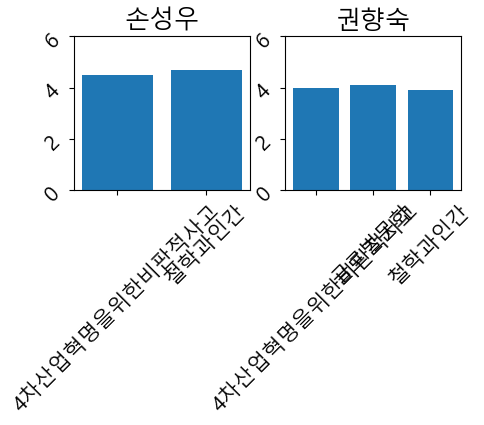

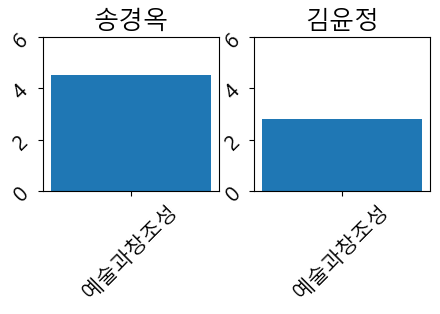

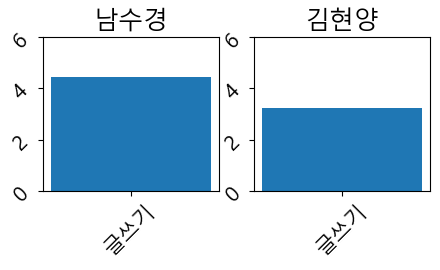

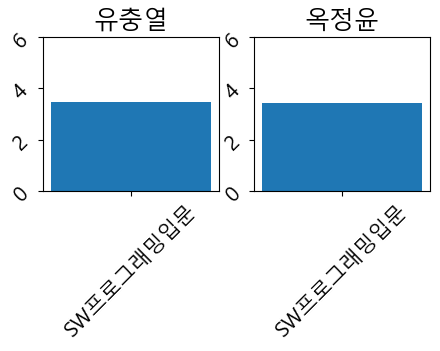

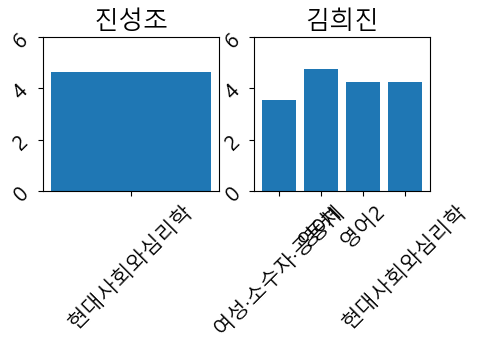

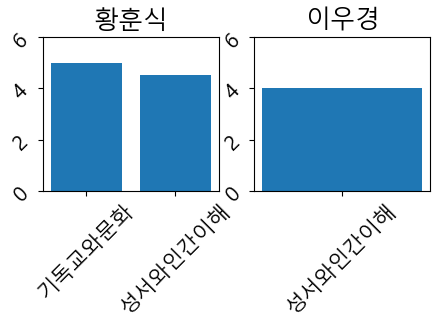

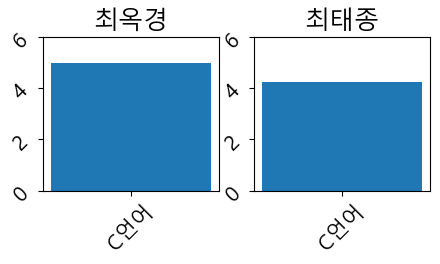

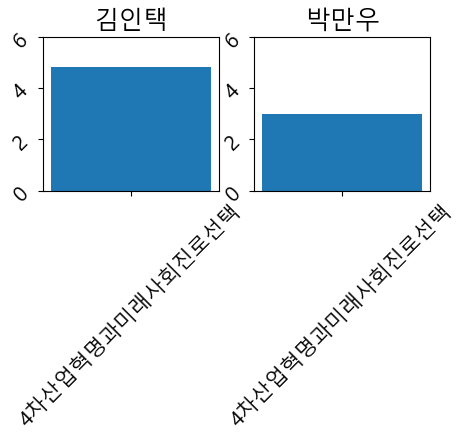

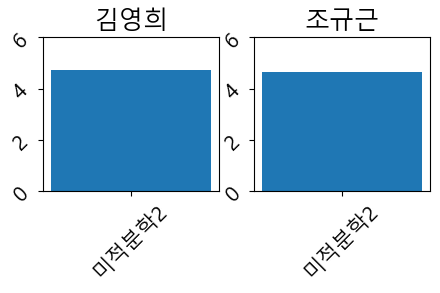

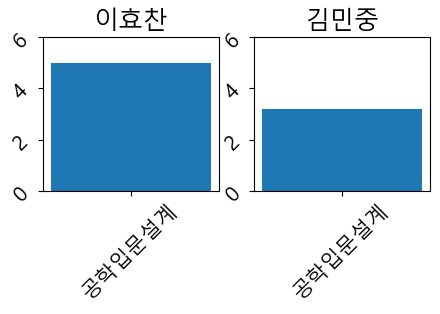

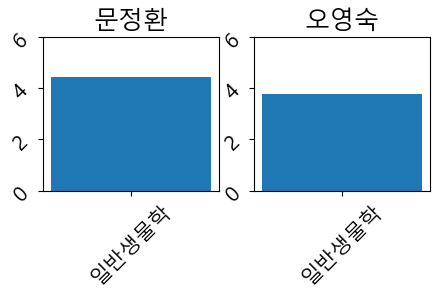

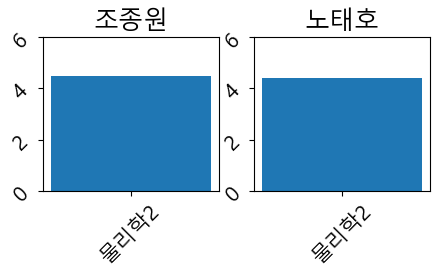

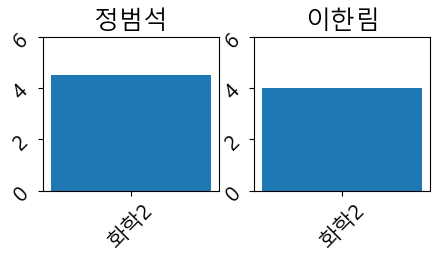

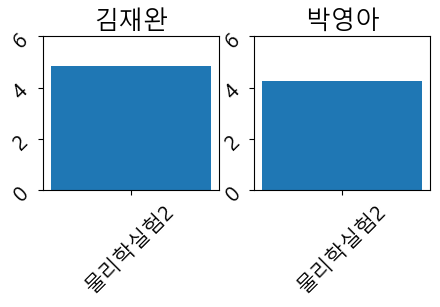

In [ ]:
for lec in lecture_list:
    max_min_prof(mean_df, lec)

### 워드 클라우드

평점이 5점인 리뷰

In [ ]:
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
from PIL import Image

In [ ]:
good_df = df.query("평점 == 'good'")
bad_df = df.query("평점 == 'bad'")
stop_word_df = pd.read_excel('./Stopword Dictionary.xlsx')

In [ ]:
def to_word_cloud(target_df, stop_word_df, word_num): # 워드클라우드 띄우고 싶은 데이터 프레임, 불용어 사전, 출력 단어 수

    # 리뷰를 하나의 리스트로 저장
    review_list = []
    for i in range(df.shape[0]):
        review_list.append(df.iloc[i]['리뷰'])
        
    # 토큰화
    tw = Twitter(jvmpath ="C:/Program Files/Java/jdk-18.0.2.1/bin/server/jvm.dll")
    tokenized = []
    
    for i in range(len(review_list)):
        tokenized.append(tw.morphs(review_list[i]))
        
    # 간단한 불용어 처리(불용어 사전에 추가 필요)
    stop_word = list(stop_word_df['word'])
    result = []
    
    for i in range(len(tokenized)):
        for word in tokenized[i]:
            if word not in stop_word:
                result.append(word)
                
    # 단어 등장 수 구하기
    c_word = Counter(result)
    
    wc = WordCloud(font_path='malgun', max_words=word_num, width=400, height=400, scale=2.0, max_font_size=200)
    gen = wc.generate_from_frequencies(c_word)
    plt.figure()
    plt.imshow(gen)

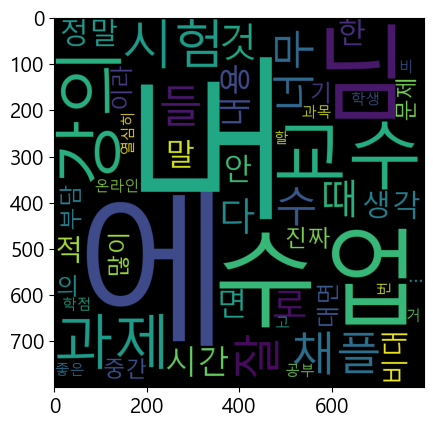

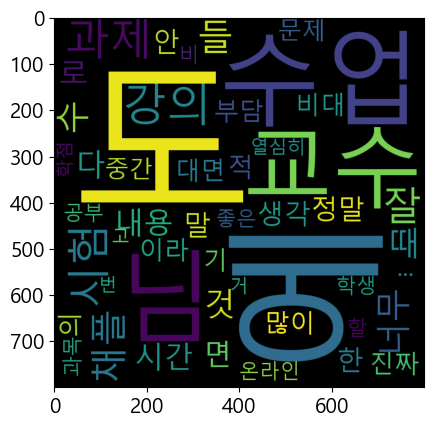

In [ ]:
to_word_cloud(good_df, stop_word_df, 50)
to_word_cloud(bad_df, stop_word_df, 50)